In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup Complete")


Setup Complete


In [182]:
#init
country = 'Russian Federation'
age_data_path = 'Data/age_data.xls'
both_sheet = 'both; 1950-2005, estimates'
female_sheet = 'f; 1950-2005, estimates'
male_sheet = 'm; 1950-2005, estimates'

unnesessary_rows = range(0,5)
# right names for columns in data sheet
columns_names = {'Reference date (as of 1 July)':'year','Total population by five-year age groups (thousands)': '0 - 4', 'Unnamed: 7': '5 - 9', 'Unnamed: 8': '10 - 14', 'Unnamed: 9': '15 - 19', 'Unnamed: 10': '20 - 24', 'Unnamed: 11': '25 - 29', 'Unnamed: 12': '30 - 34', 'Unnamed: 13': '35 - 39', 'Unnamed: 14': '40 - 44', 'Unnamed: 15': '45 - 49', 'Unnamed: 16': '50 - 54', 'Unnamed: 17': '55 - 59', 'Unnamed: 18': '60 - 64', 'Unnamed: 19': '65 - 69', 'Unnamed: 20': '70 - 74', 'Unnamed: 21': '75 - 79', 'Unnamed: 22': '80 - 84', 'Unnamed: 23': '85 - 89', 'Unnamed: 24': '90 - 94', 'Unnamed: 25': '95 - 99', 'Unnamed: 26': '100+', 'Female population by five-year age groups (thousands)': '0 - 4', 'Male population by five-year age groups (thousands)': '0 - 4'}
# names of unnesessary columns
skipped_columns = {'index', 'Index', 'Variant','Major area, region, country or area*', 'Notes', 'Country code'}



In [183]:
def extract_data(sheet):
    data = pd.read_excel(age_data_path, sheet_name=sheet, skiprows = unnesessary_rows)
    data = data[data['Major area, region, country or area*'] == country]
    data = data.rename(columns=columns_names)
    data = data.reset_index().drop(columns = skipped_columns, axis = 1)
    data.replace('-', np.nan, inplace = True)
    data = data.astype(np.float64)
    data = data.astype({'year': np.int64})
    data = data.set_index('year')
    return data

Get needed estimate data for males and females:

In [184]:
#get needed data
data_both = extract_data(both_sheet)
data_female = extract_data(female_sheet)
data_male = extract_data(male_sheet)
data_both

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
year,,,,,,,,,,,,,,,,,,,,,
1950,10040.654,7404.651,12243.902,9911.185,11714.593,7326.393,5952.458,8134.329,7007.098,5823.587,...,3416.889,3086.258,2421.912,1781.928,1183.114,966.638,NaN,NaN,NaN,NaN
1955,12636.752,10005.433,7398.446,12220.918,9851.465,11616.414,7257.741,5872.028,7976.624,6795.936,...,4022.217,3108.480,2695.539,1982.140,1314.513,1075.782,NaN,NaN,NaN,NaN
1960,13462.433,12522.356,9937.392,7332.964,12085.257,9706.714,11438.741,7118.657,5723.213,7701.589,...,5208.257,3651.109,2704.545,2197.674,1457.130,1195.011,NaN,NaN,NaN,NaN
1965,12124.980,13344.161,12434.071,9856.447,7237.965,11927.177,9549.954,11230.174,6950.253,5529.573,...,6054.348,4757.644,3204.997,2222.478,1630.470,1344.957,NaN,NaN,NaN,NaN
1970,9362.591,12021.941,13253.940,12338.287,9744.425,7129.734,11753.990,9363.572,10967.713,6724.181,...,6900.678,5531.322,4197.109,2653.160,1655.478,1519.987,NaN,NaN,NaN,NaN
1975,10102.461,9353.026,11824.666,12879.968,12157.342,9646.768,7086.269,11556.195,9087.538,10615.392,...,5057.612,6369.305,4886.831,3428.375,1904.137,1664.044,NaN,NaN,NaN,NaN
1980,10676.382,10078.104,9263.446,11510.375,13022.200,12207.244,10044.501,6446.844,11313.350,8596.415,...,6548.121,4557.702,5534.753,4126.250,2606.957,1890.693,NaN,NaN,NaN,NaN
1985,11640.253,10718.877,10118.611,9342.099,11681.805,13039.490,12125.472,9847.728,6302.915,10885.348,...,9567.094,5972.347,3995.155,4550.564,3014.876,2347.505,NaN,NaN,NaN,NaN
1990,11550.634,11727.313,10788.408,10216.220,9553.965,11760.532,12991.181,12060.358,9683.197,6146.835,...,7737.429,8815.725,5308.760,3327.175,3407.289,2841.820,NaN,NaN,NaN,NaN


Demographic profile: 

Text(0.5, 1.0, 'Demographic profile for 2005 year')

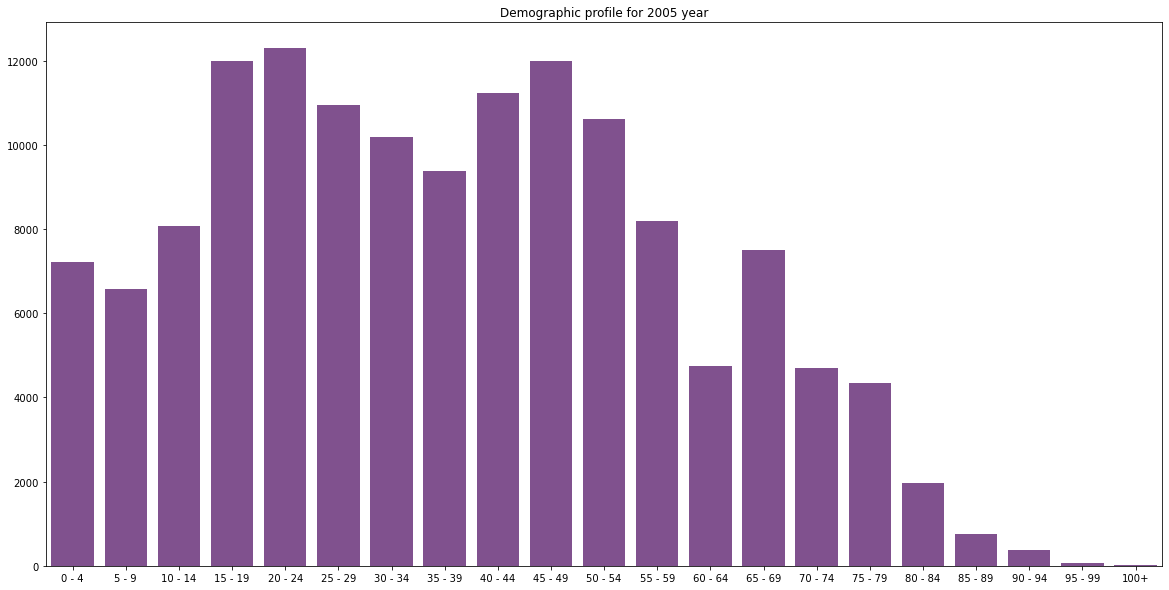

In [185]:
year = 2005
year_data = data_both.loc[year]
plt.figure(figsize=(20,10))
sns.barplot(year_data.index, year_data.values, color='#854798')
plt.title(f'Demographic profile for {year} year')

1. Determine "survival" rate:

In [186]:
year_last = 2005
year_first = 2000

popul_this_year_older = data_both.loc[year_last]
#print(popul_this_year_older)
#print(popul_this_year_older.index[0])
popul_past_year_younger = data_both.loc[year_first]
survival_rate_raw = {}
for i in range(0,len(popul_past_year_younger)-1):
    #print(popul_this_year_older[i+1], popul_past_year_younger[i])
    survival_rate_raw[popul_this_year_older.index[i+1]] = popul_this_year_older[i+1] / popul_past_year_younger[i]
#print(survival_rate_raw)
survival_rate = pd.Series(survival_rate_raw)


<AxesSubplot:>

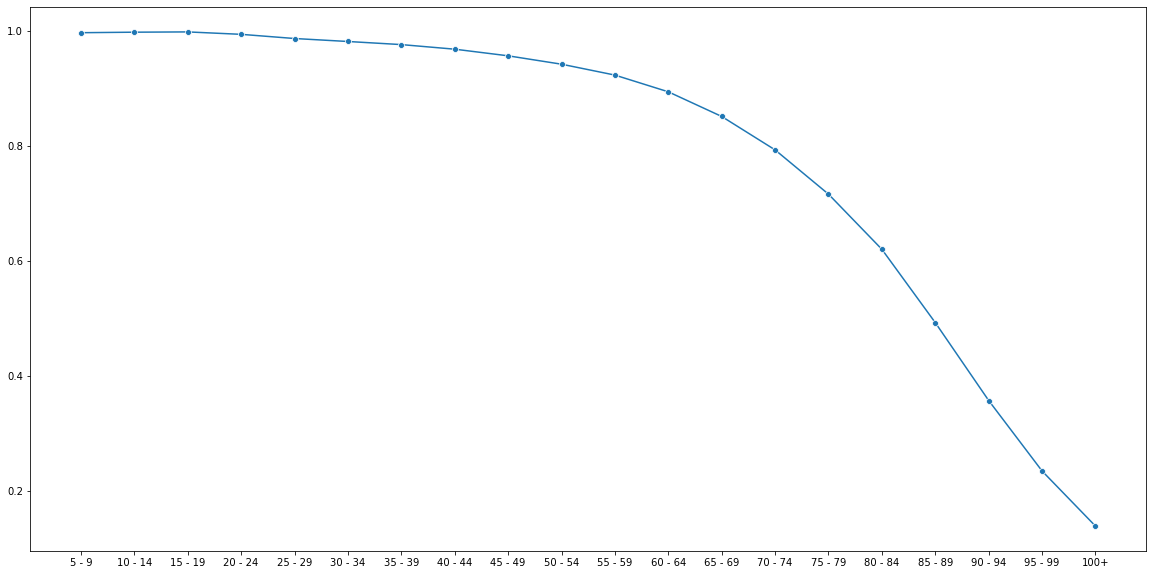

In [187]:
plt.figure(figsize=(20,10))
sns.lineplot(survival_rate.index, survival_rate.values, marker='o')